<left> <h1> <center> Project 2: Training Neural Networks using Non Linear Least Squares </center> </h1> </left>

## Neural Network Definition
We consider a neural network that approximates a non-linear function $g(\textbf{x})$ to be a function of the form:
$$\hat{y} = f_w (\textbf{x}) = w_1 \phi(w_2 x_1 + w_3 x_2 + w_4 x_3 + w_5) + w_6 \phi(w_7 x_1 + w_8 x_2 + w_9 x_3 + w_{10}) + w_{11} \phi (w_{12}x_1 + w_{13}x_2 + w_{14}x_3 + w_{15}) + w_{16} \quad$$ 
Where the scalar output is $\hat{y} \in \mathbb{R}$, the vector input is $\textbf{x} \in \mathbb{R}^3$, and the weights that parametrize the network are $\textbf{w} \in \mathbb{R}^{16}$ and $\phi$: $\mathbb{R} \rightarrow \mathbb{R}$  is defined as:
$$\phi(\textbf{x}) = \tanh(\textbf{x}) = \frac{e^\textbf{x} - e^{-\textbf{x}}}{e^\textbf{x} + e^{-\textbf{x}}} \qquad \text{(The hyperbolic tan function)}$$

## Non-linear Least Squares Objective
The goal is to determine the weights $w_1, ... w_{16}$ that best approximate a non-linear function $g(\textbf{x})$ by minimizing the sum of squared errors, defined as:
$$\sum_{n=1}^N (f_w(\textbf{x}^{(n)}) - y^{(n)})^2 = \sum_{n=1}^N r_n(w)^2$$
Where $y^{(n)}$ is the output of $g(\textbf{x})$ for the vector input $x^{(n)}$. 

## <center> Part 1 </center>
 The gradient of $f_w(\textbf{x})$ is given by:

$$
\nabla_w f_w(\textbf{x}) = 
\begin{bmatrix}
\frac{\partial}{\partial w_1}f_w(\textbf{x}) \\
\frac{\partial}{\partial w_2}f_w(\textbf{x}) \\
\vdots \\
\frac{\partial}{\partial w_{16}} f_w(\textbf{x})
\end{bmatrix}
=
\begin{bmatrix}
\phi(w_2 x_1 + w_3 x_2 + w_4 x_3 + w_5) \\
w_1 \phi'(w_2 x_1 + w_3 x_2 + w_4 x_3 + w_5) x_1 \\
w_1 \phi'(w_2 x_1 + w_3 x_2 + w_4 x_3 + w_5) x_2 \\
w_1 \phi'(w_2 x_1 + w_3 x_2 + w_4 x_3 + w_5) x_3 \\
w_1 \phi'(w_2 x_1 + w_3 x_2 + w_4 x_3 + w_5) \\
\phi(w_7 x_1 + w_8 x_2 + w_9 x_3 + w_{10}) \\
w_6 \phi'(w_7 x_1 + w_8 x_2 + w_9 x_3 + w_{10}) x_1 \\
w_6 \phi'(w_7 x_1 + w_8 x_2 + w_9 x_3 + w_{10}) x_2 \\
w_6 \phi'(w_7 x_1 + w_8 x_2 + w_9 x_3 + w_{10}) x_3 \\
w_6 \phi'(w_7 x_1 + w_8 x_2 + w_9 x_3 + w_{10}) \\
\phi(w_{12}x_1 + w_{13}x_2 + w_{14}x_3 + w_{15}) \\
w_{11} \phi'(w_{12}x_1 + w_{13}x_2 + w_{14}x_3 + w_{15}) x_1 \\
w_{11} \phi'(w_{12}x_1 + w_{13}x_2 + w_{14}x_3 + w_{15}) x_2 \\
w_{11} \phi'(w_{12}x_1 + w_{13}x_2 + w_{14}x_3 + w_{15}) x_3 \\
w_{11} \phi'(w_{12}x_1 + w_{13}x_2 + w_{14}x_3 + w_{15}) \\
1
\end{bmatrix}
$$
Where $\phi'(x) = \frac{d}{dx} \bigg( \frac{e^x -e^{-x}}{e^x+e^{-x}} \bigg) = \frac{4e^{2x}}{(e^{2x}+1)^2}$

## <center> Part 2 </center>
$$\textbf{r}(w) = \big[ r_1 \quad r_2\quad ...\quad r_N \big] = \big[ f_w(\textbf{x}^{(1)}) - y^{(1)}\quad f_w(\textbf{x}^{(2)}) - y^{(2)} \quad ... \quad f_w(\textbf{x}^{(N)}) - y^{(N)} \big] $$
The gradient of the sum of squared error is:
$$\nabla_w \parallel \textbf{r}(w) \parallel^2 = \nabla_w \bigg( \sum_{n=1}^N r_n(w)^2 \bigg) = 2 \sum_{n=1}^N r_n(w) \dot \nabla_w r_n(w) \quad \text{(using the chain rule)} $$
Which can be rewritten as:
$$2(r_1(w)\nabla_w r_1(w) + r_2(w)\nabla_w r_2(w) + ... + r_N(w)\nabla_w r_N(w)) = 2 \big[\nabla_w r_1(w) \quad \nabla_w r_2(w)  \quad ... \quad \nabla_w r_N(w)\big] \begin{bmatrix}
r_1(w)\\
r_2(w)\\
\vdots\\
r_N(w)
\end{bmatrix}$$

$$ = 2 \begin{bmatrix}
\nabla_w r_1(w)\\
\nabla_w r_1(w)\\
\vdots \\
\nabla_w r_1(w)
\end{bmatrix}^T \begin{bmatrix}
r_1(w)\\
r_2(w)\\
\vdots\\
r_N(w)
\end{bmatrix} = 2 \textbf{Dr}(w)^T\textbf{r}(w), \quad \text{where} \: \:\textbf{Dr}(w) = \begin{bmatrix}
\nabla_w r_1(w)\\
\nabla_w r_2(w)\\
\vdots \\
\nabla_w r_N(w)
\end{bmatrix} = \begin{bmatrix}
\nabla_w f_w(x^{(1)})\\
\nabla_w f_w(x^{(2)})\\
\vdots \\
\nabla_w f_w(x^{(N)})
\end{bmatrix}$$
The last step is due to the fact that $r_n(w)$ is defined as $y^{(n)} - f_w(x^{(n)})$ which means $\nabla_w r_n(w) = \nabla_w f_w(x^{(n)})$, since $y^{(n)}$ is not a function of $w$.

## <center> Part 3 </center>

The training data for the neural network to approximate the non-linear function $g(\textbf{x}) = x_1 x_2 + x_3$ will consist of $N=500$ randomly generated points, $\mathbf{x}^{(n)} = \begin{bmatrix} x_1^{(n)} \\ x_2^{(n)} \\ x_3^{(n)} \end{bmatrix} \in \mathbb{R}^3$, such that max$ \{ |x_1^{(n)}|,|x_2^{(n)}|,|x_3^{(n)}| \} \leq \Gamma = 1$ for all $n = 1,2,...,N$.

The training pairs $\big(\textbf{x}^{(n)}, y^{(n)} \big) _{n=1}^N$ will be used to minimize the training loss with respect to $\textbf{w}$, $l(\textbf{w}) = \sum_{n=1}^N r_n^2(\textbf{w}) + \lambda \parallel \textbf{w} \parallel^2_2$
The training data $\textbf{x}$ and $y$ is generated below. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Generates num training points x_1, x_2, x_3 in R^3 between -gamma and +gamma and y = function(x_1, x_2, x_3)
def random_data(num = 500, gamma = 1, function = lambda x_1, x_2, x_3: x_1*x_2 + x_3):
    x_train = []
    y_train = np.empty((0,))
    for i in range(num):
        x_1 = np.random.uniform(-gamma, gamma)
        x_2 = np.random.uniform(-gamma, gamma)
        x_3 = np.random.uniform(-gamma, gamma)
        x_train.append([x_1, x_2, x_3])
        y_train = np.append(y_train, function(x_1, x_2, x_3))
    return np.array(x_train), y_train

### Levenberg-Marquardt algorithm
The Levenberg-Marquardt algorithm is a variation of the Gauss-Newton algorithm and addresses the issue of the algorithm diverging when the estimated points get further and further away. The algorithm to solve for $w$, the correct weights to approximate $g(\textbf{x})$ is as follows:
1. The *affine approximation* at the current iterate is calculated by first order Taylor Approximation given by:
$$r(w;w^{(k)}) = r(w^{(k)}) + \textbf{D}r(w^{(k)})(w-w^{(k)})$$
2.  Next, the *tentative iterate*, $w^{(k+1)}$ minimizes $\parallel r(w;w^{(k)})\parallel^2 + \lambda^{(k)}\parallel w-w^{(k)}\parallel ^2 $. $w^{(k+1)}$ is given by:
$$w^{(k+1)} = w^{(k)} - \big( \textbf{D}r(w^{(k)})^T \textbf{D}r(w^{(k)}) + \lambda ^{(k)} I \big)^{-1}\textbf{D}r(w^{(k)})^T r(w^{(k)})]$$
3. Finally, the *tentative iterate* is checked against the previous one. If $\parallel r(w^{(k+1)}) \parallel ^2 < \parallel r(w^{(k)}) \parallel^2$, $w^{(k+1)}$ is accepted and $\lambda^{(k+1)} = .8\lambda^{(k)}$. Otherwise, $w^{(k+1)} = w^{(k)}$ and $\lambda^{(k+1)} = 2\lambda^{(k)}$.

The algorithm terminates when either terms $\parallel r(w^{(k+1)} \parallel ^2$ or $\parallel 2\textbf{D}r(w^{(k+1)})^T r(w^{(k+1)}) \parallel$ are small enough.



### Implementation

In [11]:
# exception for when the algorithm has converged
class StopIteration(Exception):
    def __init__(self, message = "The algorithm has converged."):
        self.message = message
        super().__init__(self.message)

# f_w(x), the estimate of y given xn=[x_1, x_2, x_3] and w = [w_1 ... w_16]
def f_w(x, w):
    x_1, x_2, x_3 = x
    w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8, w_9, w_10, w_11, w_12, w_13, w_14, w_15, w_16 = w
    return w_1*np.tanh(w_2*x_1 + w_3*x_2 + w_4*x_3 + w_5) + w_6*np.tanh(w_7*x_1 + w_8*x_2 + w_9*x_3 + w_10) + w_11*np.tanh(w_12*x_1 + w_13*x_2 + w_14*x_3 + w_15) + w_16

# vector of f_w(x) for all x in training data
def f_w_vec(x, w):
    y = np.empty((0,))
    for x_n in x:
        y = np.append(y, f_w(x_n, w))
    return y

# derivative of tanh(x)
def tanh_p(x):
    e = np.exp(1)
    return (4 * e ** (2 * x)) / ((e ** (2 * x) + 1) ** 2)

# gradient of f_w(x) with respect to w
def nabla_f_w(x, w):
    x_1, x_2, x_3 = x
    w_1, w_2, w_3, w_4, w_5, w_6, w_7, w_8, w_9, w_10, w_11, w_12, w_13, w_14, w_15, w_16 = w
    return np.array([np.tanh(w_2*x_1 + w_3*x_2 + w_4*x_3 + w_5), w_1*tanh_p(w_2*x_1 + w_3*x_2 + w_4*x_3 + w_5)*x_1, w_1*tanh_p(w_2*x_1 + w_3*x_2 + w_4*x_3 + w_5)*x_2, w_1*tanh_p(w_2*x_1 + w_3*x_2 + w_4*x_3 + w_5)*x_3, w_1*tanh_p(w_2*x_1 + w_3*x_2 + w_4*x_3 + w_5), np.tanh(w_7*x_1 + w_8*x_2 + w_9*x_3 + w_10), w_6*tanh_p(w_7*x_1 + w_8*x_2 + w_9*x_3 + w_10)*x_1, w_6*tanh_p(w_7*x_1 + w_8*x_2 + w_9*x_3 + w_10)*x_2, w_6*tanh_p(w_7*x_1 + w_8*x_2 + w_9*x_3 + w_10)*x_3, w_6*tanh_p(w_7*x_1 + w_8*x_2 + w_9*x_3 + w_10), np.tanh(w_12*x_1 + w_13*x_2 + w_14*x_3 + w_15), w_11*tanh_p(w_12*x_1 + w_13*x_2 + w_14*x_3 + w_15)*x_1, w_11*tanh_p(w_12*x_1 + w_13*x_2 + w_14*x_3 + w_15)*x_2, w_11*tanh_p(w_12*x_1 + w_13*x_2 + w_14*x_3 + w_15)*x_3, w_11*tanh_p(w_12*x_1 + w_13*x_2 + w_14*x_3 + w_15), 1])

# gradient of r_n(w) with respect to w (same as nabla_f_w(x, w), implemented for clarity)
def nabla_r_n(x, w):
    return nabla_f_w(x, w) 

# derivative matrix of r_n(w) for all x in training data, made up of stacked gradients
def dr_w_matrix(x, w):
    mat = np.empty((0,16))
    for x_n in x:
        mat = np.vstack((mat, nabla_r_n(x_n, w)))
    return mat

# find the next iterate of w given the current iterate w_k, the training data x, y, and l (lambda). Also returns the new lambda. 
# raises StopIteration if the algorithm has converged.
def next_iterate(last_iterate, x, y, l, num_iter, max_iter, stop = .02):
    w_k = last_iterate
    dr = dr_w_matrix(x, w_k)
    f_w = f_w_vec(x, w_k)
    r = f_w - y
    w_k_1 = w_k - np.linalg.inv(dr.T @ dr + l*np.identity(16)) @ dr.T @ r # next iterate
    r_1 = f_w_vec(x, w_k_1) - y

    if np.linalg.norm(r_1.T @ r_1) < stop or num_iter >= max_iter: # check if algorithm has converged
        raise StopIteration
    elif np.linalg.norm(r_1)**2 < np.linalg.norm(r)**2: # check if next iterate is better
        return w_k_1, .8*l
    else:
        return w_k, 2*l
    
# training loss with respect to weights w, given training data (x,y) and l (lambda) for the iterate
def training_loss(w, x, y, l):
    loss = 0
    return np.inner((f_w_vec(x,w) - y), (f_w_vec(x,w) - y)) + l*np.linalg.norm(w)**2

In [12]:
def make_weights(l = .00001, weights_intitial = np.random.normal(0, 1, 16), num = 500, gamma = 1, function = lambda x_1, x_2, x_3: x_1*x_2 + x_3):
    loss = []
    num_iter = 0
    x, y = random_data(num, gamma, function)
    w = weights_intitial
    best_w = w
    best_loss = training_loss(w, x, y, l)
    while True:
        try:
            w, l = next_iterate(w, x, y, l, num_iter, max_iter = 1000)
            loss.append(training_loss(w, x, y, l))
            if loss[-1] < best_loss:
                best_w = w
                best_loss = loss[-1]
        except StopIteration:
            break
        except KeyboardInterrupt:
            break
        num_iter += 1    
            
    return (best_w, loss)

### (a) 

The network will be trained for $g(\textbf{x}) = x_1 x_2 + x_3$ using randomly generated $(\textbf{x}^{(n)}, y^{(n)})_{n=1}^N$, where each element $|x_i^{(n)}| \leq \Gamma$ for $i = 1,2,3$ and $y^{(n)} = g(x^{(n)})$. $\Gamma = 1$, and $N = 500$. The algorithm stops when any of the following are met:
- $\parallel r(w^{(k+1)} \parallel ^2 < .02$ 
- Number of iterations = 1000

Weights will be generated 4 times for $\lambda = 10^{-3}, 10^{-4}, 10^{-5}, 10^{-6}$. 

In [13]:
weights_3, loss_3 = make_weights(l = .001)
weights_4, loss_4 = make_weights(l = .0001)
weights_5, loss_5 = make_weights(l = .00001)
weights_6, loss_6 = make_weights(l = .00001)

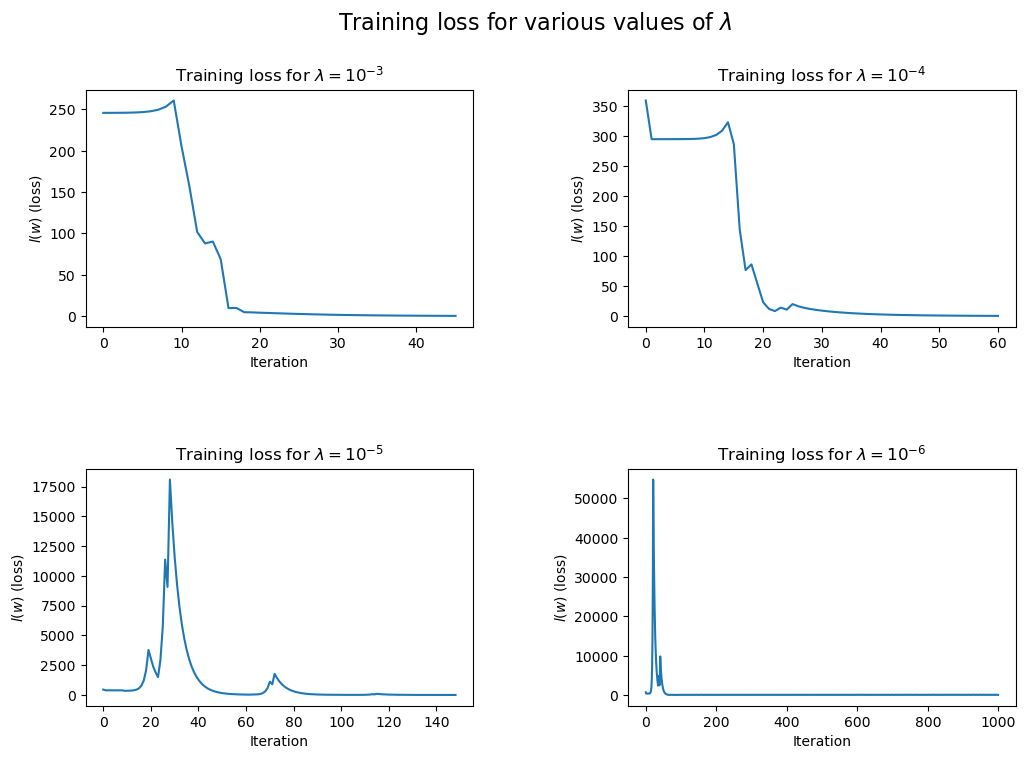

In [14]:
fig = plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
plt.plot(loss_3)
plt.title("Training loss for $\lambda = 10^{-3}$")
plt.xlabel("Iteration")
plt.ylabel("$l(w)$ (loss)")

plt.subplot(2,2,2)
plt.plot(loss_4)
plt.title("Training loss for $\lambda = 10^{-4}$")
plt.xlabel("Iteration")
plt.ylabel("$l(w)$ (loss)")

plt.subplot(2,2,3)
plt.plot(loss_5)
plt.title("Training loss for $\lambda = 10^{-5}$")
plt.xlabel("Iteration")
plt.ylabel("$l(w)$ (loss)")

plt.subplot(2,2,4)
plt.plot(loss_6)
plt.title("Training loss for $\lambda = 10^{-6}$")
plt.xlabel("Iteration")
plt.ylabel("$l(w)$ (loss)")

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.suptitle('Training loss for various values of $\lambda$', fontsize=16);

It's evident from the plots above that the choice of $\lambda$ has a significant impact on the training loss. For $\lambda = 10^{-3}, 10^{-4}, \lambda = 10^{-4}$ the training loss drops significantly and converges before 1000 iterations. For $\lambda = 10^{-6}$, the training loss does not converge before 1000 iterations. This could be due to overfitting. 


### (b)

### (c)
Here, I choose the function $g(\textbf{x}) =  $

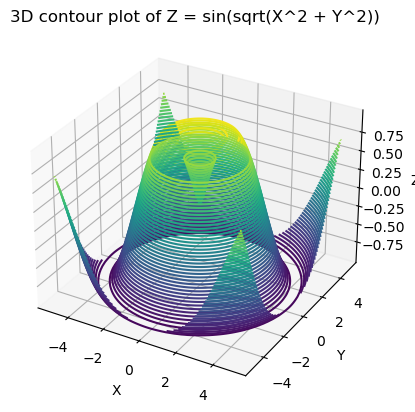